# Course Name: **AI Mastery Bootcamp: AI Algorithms, DeepSeek AI, AI Agents**

#Section 4: Week 4: **Mathematics for Machine Learning and Artificial Intelligence**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
url= "https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/tips.csv"
df= pd.read_csv(url)
print(df.shape)
df.head(2)

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [4]:
# Inspect Data
print(df.info())
print("*"*100)
display(df.describe().T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
****************************************************************************************************


,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


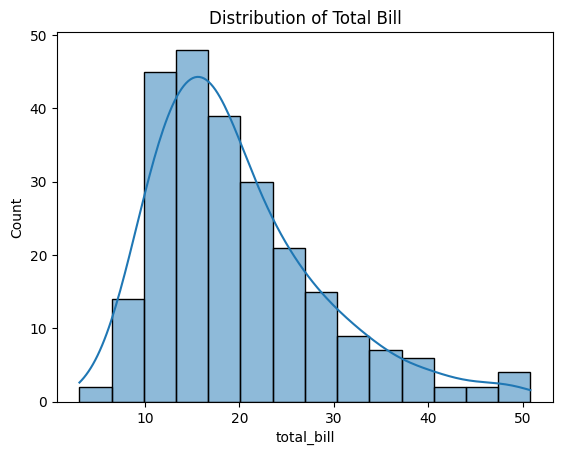

In [5]:
# Visulize
sns.histplot(df['total_bill'], kde= True)
plt.title("Distribution of Total Bill")
plt.show()

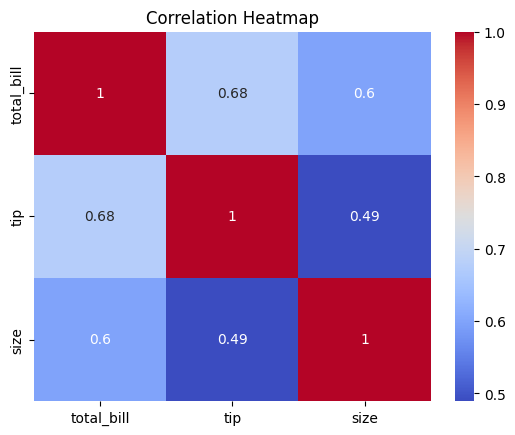

In [7]:
# Correlation Heatmap
numerical_cols= df.select_dtypes(include= [int, float]).columns
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap= 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# Hyppothesis Testing
from scipy.stats import ttest_ind

# Separate data by gender
male_tips= df[df['sex'] == 'Male']['tip']
female_tips= df[df['sex'] == 'Female']['tip']

t_stat, p_value= ttest_ind(male_tips, female_tips)
print("T-Statistic: ", round(t_stat, 2))
print("P-Value: ", round(p_value, 2))

# Iterpret results
alpha= 0.05
if p_value <= alpha:
  print("Reject the Null Hypothesis: Significant Difference")
else:
  print("Fail to Reject the Null Hypothesis: No Significant Difference")

T-Statistic:  1.39
P-Value:  0.17
Fail to Reject the Null Hypothesis: No Significant Difference


In [11]:
from sklearn.linear_model import LinearRegression

# Define the variables
X= df['total_bill'].values.reshape(-1, 1)
y= df['tip'].values

# Fit Linear Regression
model= LinearRegression()
model.fit(X, y)

# Output Coefficient
print("Slope: ", model.coef_[0])
print("Intercept: ", model.intercept_)
print("R-Squared: ", model.score(X, y))

Slope:  0.10502451738435337
Intercept:  0.9202696135546731
R-Squared:  0.45661658635167657


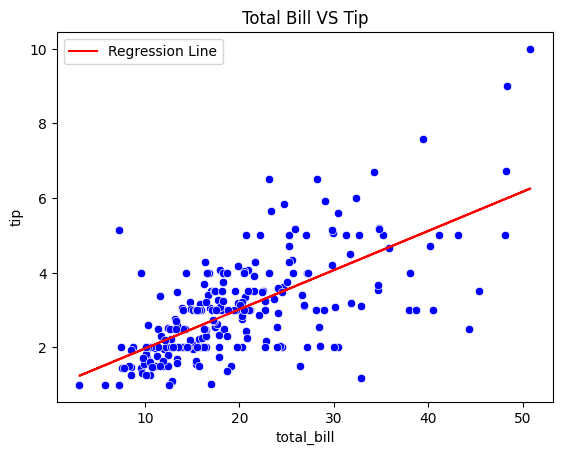

In [12]:
# Plot Regression
sns.scatterplot(x= df['total_bill'], y= df['tip'], color= "blue")
plt.plot(df['total_bill'], model.predict(X), color= "red", label= "Regression Line")
plt.title("Total Bill VS Tip")
plt.legend()
plt.show()

In [16]:
from scipy.stats import chi2_contingency

contingency_table= pd.crosstab(df['smoker'], df['time'])

# Perform the Chi-Square Test

chi2, p, dof, expected_freq=  chi2_contingency(contingency_table)
print("Chi-Square Statistic: ", chi2)
print("P-Value: ", p)
print("Degree of Freedom: ", dof)
print("Expected Frequency : \n", expected_freq)

# Iterpret results
alpha= 0.05
if p_value <= alpha:
  print("Reject the Null Hypothesis: Variables are Dependent")
else:
  print("Fail to Reject the Null Hypothesis: Variables are Independent")

Chi-Square Statistic:  0.5053733928754354
P-Value:  0.4771485672079724
Degree of Freedom:  1
Expected Frequency : 
 [[108.91803279  42.08196721]
 [ 67.08196721  25.91803279]]
Fail to Reject the Null Hypothesis: Variables are Independent
